In [0]:
import numpy as np
import pandas as pd

transition_mat=np.array([[0.7,0.3],
                         [0.2,0.8]])

intial_values= np.array([1.0,0.5])

#Transitioning for 3 turns
transition_mat_3= np.linalg.matrix_power(transition_mat,3)

#Transitioning for 10 turns
transition_mat_10= np.linalg.matrix_power(transition_mat,10)

#Transitioning for 35 turns
transition_mat_35= np.linalg.matrix_power(transition_mat,35)

#ouput estimation of the values
output_values= np.dot(intial_values,transition_mat)
print(output_values)
#output values after 3 iterations
output_values_3= np.dot(intial_values,transition_mat_3)
print(output_values_3)
#output values after 10 iterations
output_values_10= np.dot(intial_values,transition_mat_10)
print(output_values_10)
#output values after 35 iterations
output_values_35= np.dot(intial_values,transition_mat_35)
print(output_values_35)



[0.8 0.7]
[0.65 0.85]
[0.60039062 0.89960938]
[0.6 0.9]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

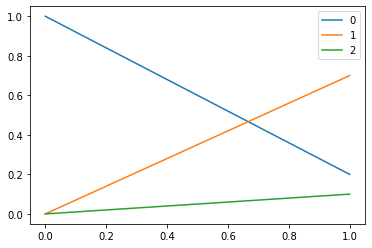

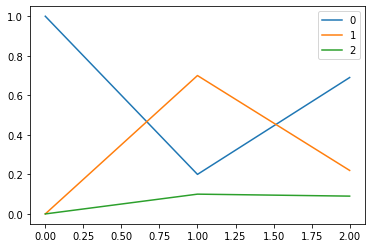

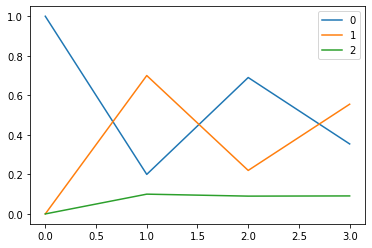

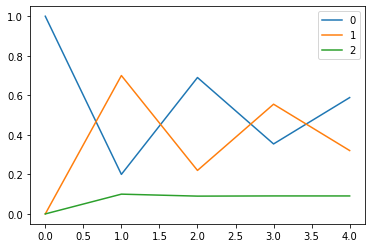

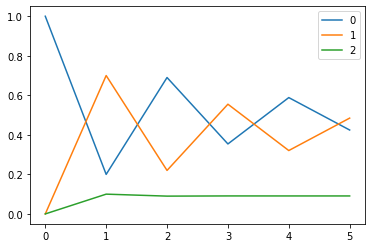

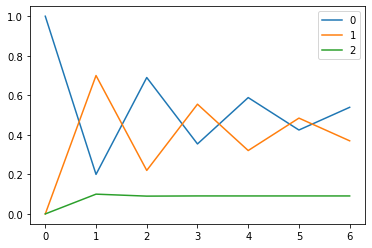

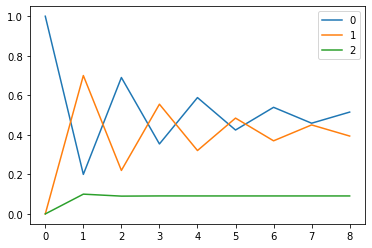

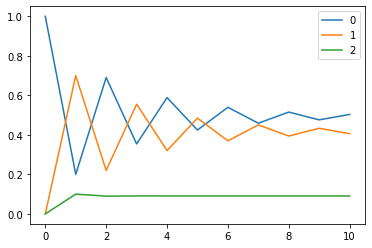

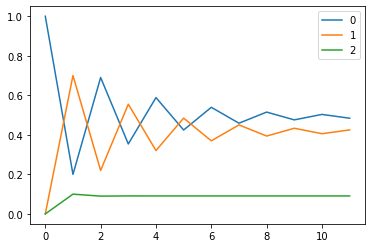

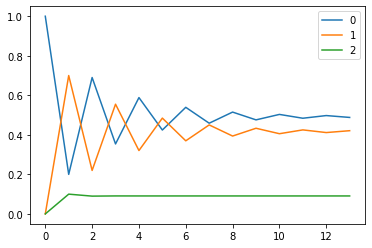

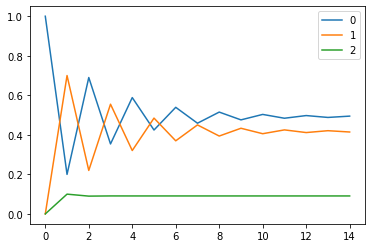

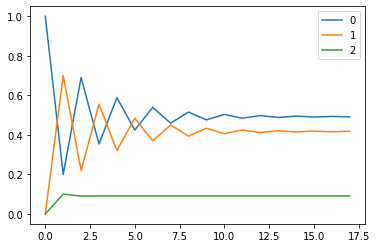

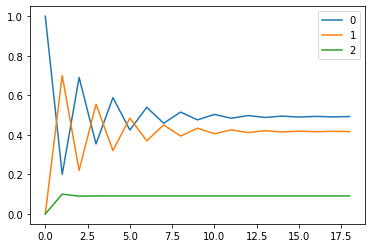

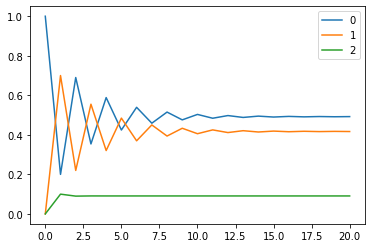

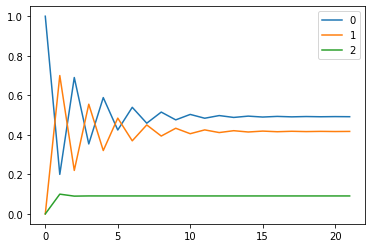

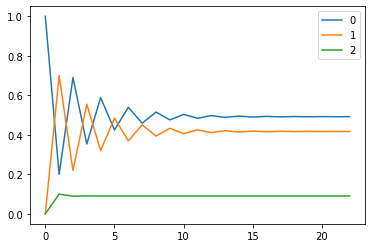

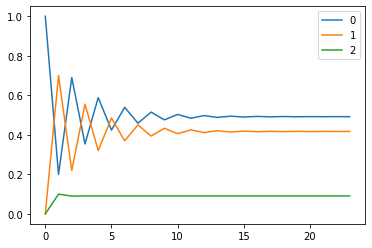

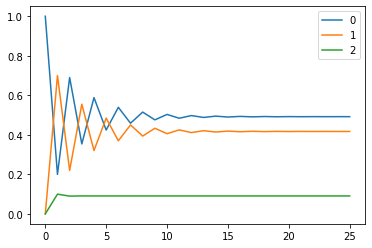

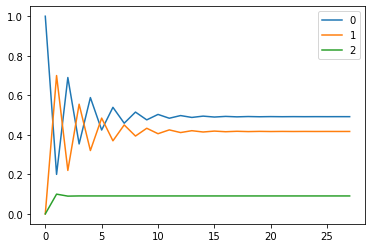

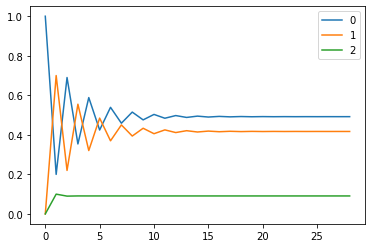

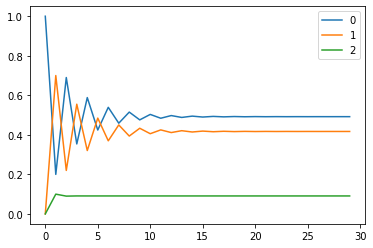

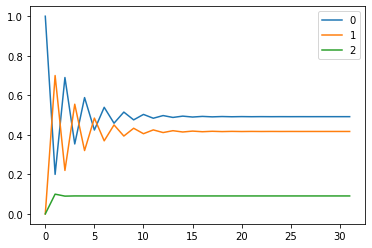

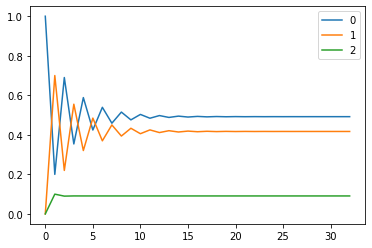

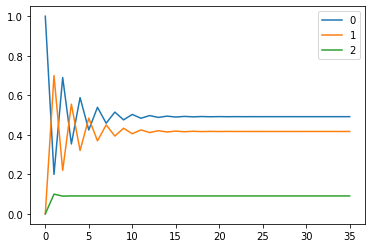

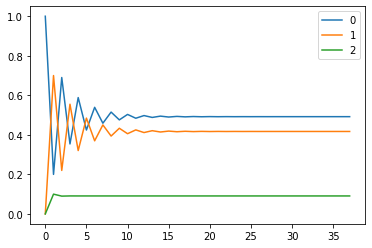

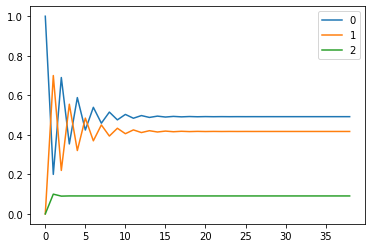

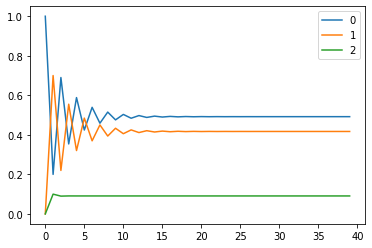

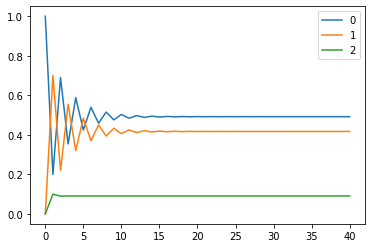

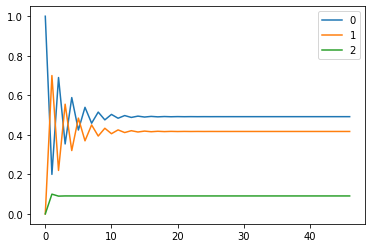

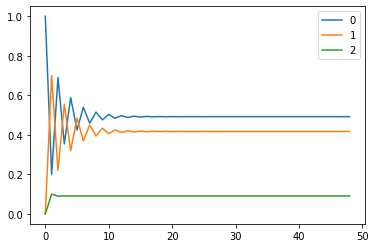

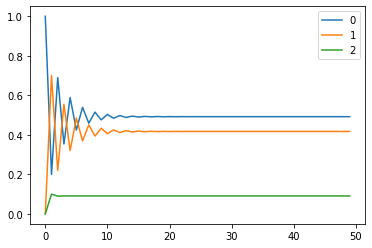

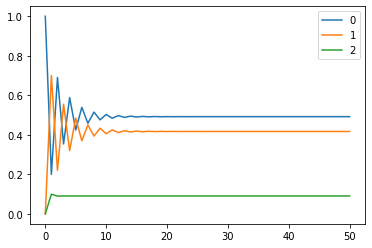

In [0]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

transition_mat = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])
initial_state=np.array([[1.0, 0.0, 0.0]])
state_hist=initial_state
dfStateHist=pd.DataFrame(initial_state)

for x in range(50):
  initial_state=np.dot(initial_state,transition_mat)
  #print(state)
  state_hist=np.append(state_hist,initial_state,axis=0)
  dfDistrHist = pd.DataFrame(state_hist)
  dfDistrHist.plot()
plt.show()

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [0]:
import tensorflow as tf
import tensorflow_probability as tfp
tf_distributions=tfp.distributions

#Generate Hidden Markov Model With Tensorflow
#Transition Probability of states
transition_mat=tf_distributions.Categorical(probs=[[0.7,0.3],
                                                  [0.2,0.8]])
#Intial Probability of states
intial_values= tf_distributions.Categorical(probs=[1.0,0.5])

#Creating a Distribution Pattern for State Observation: Mean and STD of 1st state is 2.5 and 10 respectively and that of 2nd state is 6.5 and 7 respectively. 
observation_mat= tf_distributions.Normal(loc=[2.5,10],scale=[6.5,7])

#HMM
model=tf_distributions.HiddenMarkovModel(initial_distribution=intial_values,transition_distribution=transition_mat,observation_distribution=observation_mat,
                                         num_steps=10,allow_nan_stats=True,name="HiddenMarkovModel")
#Mean of the Distribution of States
print(model.mean())
#Log probability of 0 enumerated states i.e 1st State
print(model.log_prob(tf.zeros(shape=[10])))
#Log probability of 1 enumerated states i.e 2nd State
print(model.log_prob(tf.zeros(shape=[10])))


tf.Tensor(
[5.        5.9999995 6.5       6.7500005 6.8749995 6.9374995 6.9687495
 6.984374  6.9921865 6.996093 ], shape=(10,), dtype=float32)
tf.Tensor(-31.65669, shape=(), dtype=float32)
tf.Tensor(-31.65669, shape=(), dtype=float32)


In [0]:
#Explaining States Actions and Rewards based on OpenAI CartPole Example

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import deque
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
#Building a class for Deep Q learning to understand Environment and Agents

class DeepQLearning():

  def __init__(self,no_episodes=250,no_complete=50,env_steps=None,gamma=0.9,epsilon=0.9,epsilon_min=0.05,log_epsilon=0.855,alpha=0.01,
               alpha_decay=0.01,batch_size=128,monitor=False,quiet=False):
    self.replay_memory= deque(maxlen=1000)
    self.env=gym.make('CartPole-v0')
    self.gamma=gamma
    self.epsilon=epsilon
    self.epsilon_min=epsilon_min
    self.log_epsilon=log_epsilon
    self.alpha=alpha
    self.alpha_decay=alpha_decay
    self.no_episodes=no_episodes
    self.no_complete=no_complete
    self.batch_size=batch_size
    self.quiet=quiet
    if env_steps is not None:
      self.env._max_episode_steps=env_steps
    
    self.model=Sequential()
    self.model.add(Dense(48,input_dim=4,activation="tanh"))
    self.model.add(Dense(48,activation="tanh"))
    self.model.add(Dense(2,activation="sigmoid"))
    self.model.compile(loss='mse',optimizer=Adam(lr=self.alpha,decay=self.alpha_decay))

  def remember(self,state,action,reward,next_state,done):
    self.replay_memory.append((state,action,reward,next_state,done))
  
  def choose_step(self,state,epsilon):
    return self.env.action_space.sample() if(np.random.random()<=epsilon)  else np.argmax(self.model.predict(state))

  def preprocess_state(self,state):
    return np.reshape(state,[1,4])
  
  def get_epsilon(self,t):
    return max(self.epsilon_min,min(self.epsilon,1.0-math.log((t+1)*self.log_epsilon)))

  def decay_epsilon(self):
    if self.epsilon>self.epsilon_min:
      self.epsilon*=self.log_epsilon
    
  def replay(self,batch_size):
    x_batch,y_batch=[],[]
    minibatch=random.sample(
        self.replay_memory,min(len(self.replay_memory),batch_size))
    for state,action,reward,next_state,done in minibatch:
      y_target=self.model.predict(state)
      y_target[0][action]=reward if done else reward+self.gamma*(np.max(self.model.predict(next_state)[0]))
      x_batch.append(state[0])
      y_batch.append(y_target[0])
    self.model.fit(np.array(x_batch),np.array(y_batch),batch_size=len(x_batch),verbose=1)
    self.decay_epsilon()

  def run(self):
    print(self.env.action_space)
    total_scores=deque(maxlen=100)
    for i in range(self.no_episodes):
      state= self.preprocess_state(self.env.reset())
      done=False
      j=0
      while not done:
        action= self.choose_step(state,self.get_epsilon(i))
        next_state,reward,done,_=self.env.step(action)
        next_state=self.preprocess_state(next_state)
        self.remember(state,action,reward,next_state,done)
        #self.env.render()

        
        state=next_state
        j+=1
      total_scores.append(j)
      mean_score=np.mean(total_scores)
      if mean_score >=self.no_complete and i>=100:
        if not self.quiet:
          print("Ran {} episodes.Solving after {} trainings".format(i,i-100))
          return i-100
      if i%100==0 and not self.quiet:
        print("Episode Completed {} .Mean score {}".format(i,mean_score))
      
      self.replay(self.batch_size)
    if not self.quiet:
      print("Not solved after {} episodes",format(i))
    return i



if __name__=="__main__":
  agent=DeepQLearning()
  agent.run()
  
    
   
  



Discrete(2)
Episode Completed 0 .Mean score 25.0
Epoch 1/1
25/25 [==============================] - 0s 3ms/step - loss: 0.4462
Epoch 1/1
38/38 [==============================] - 0s 42us/step - loss: 0.4716
Epoch 1/1
71/71 [==============================] - 0s 23us/step - loss: 0.4608
Epoch 1/1
128/128 [==============================] - 0s 12us/step - loss: 0.4500
Epoch 1/1
128/128 [==============================] - 0s 13us/step - loss: 0.4415
Epoch 1/1
128/128 [==============================] - 0s 14us/step - loss: 0.4428
Epoch 1/1
128/128 [==============================] - 0s 12us/step - loss: 0.4369
Epoch 1/1
128/128 [==============================] - 0s 12us/step - loss: 0.4179
Epoch 1/1
128/128 [==============================] - 0s 14us/step - loss: 0.4153
Epoch 1/1
128/128 [==============================] - 0s 14us/step - loss: 0.4079
Epoch 1/1
128/128 [==============================] - 0s 12us/step - loss: 0.4019
Epoch 1/1
128/128 [==============================] - 0s 13us/step -